In [2]:
import pandas as pd
data = pd.read_csv('Documents/mIHC_ZG/data/Classified_CSV/KUNIBulkNuclei_KN00012ROI01.csv')

In [2]:
import scanpy as sc
import numpy as np
import squidpy as sq

In [1]:
# Step 1: Select your marker columns (data matrix X), this is marker expression, i did not include all. 
markers = ['DNA', 'PD1', 'MHCII', 'CD206', 'CD45', 'CD11C', 'LY6G', 'ASMA', 'KI67', 'PANCK']
X = data[markers].values  # This becomes your data matrix
# Step 2: Create the obs (metadata for each cell/observation)
obs = data[['class']].copy()
# Step 3: Create var (metadata for each marker/variable)
var = pd.DataFrame(index=markers)  # We simply use the marker names as the index for now
# Step 4: Create the AnnData object
adata = sc.AnnData(X=X, obs=obs, var=var)
# Add spatial coordinates to 'obsm'
adata.obsm['spatial'] = data[['Location_Center_X', 'Location_Center_Y']].values
adata.write('anndata/KN00012ROI01.h5ad')
print(adata)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


NameError: name 'data' is not defined

In [5]:
print(adata.obsm['spatial'])

[[2953.27906977   52.9255814 ]
 [1828.62048193 3273.21686747]
 [1595.36363636 1480.51515152]
 ...
 [ 219.02020202 2200.03030303]
 [3969.42293907  504.04659498]
 [ 802.53435115 2600.80534351]]


In [28]:
#sanity check the anndata by converting back to csv
X_matrix = adata.X
if not isinstance(X_matrix, pd.DataFrame):
    X_matrix = pd.DataFrame(X_matrix.toarray() if hasattr(X_matrix, "toarray") else X_matrix, 
                            index=adata.obs_names, columns=adata.var_names)
X_matrix.to_csv('adata_expression_matrix.csv')
 
# 2. Export the cell metadata 'obs'
adata.obs.to_csv('adata_obs.csv')
 
# 3. Export the gene metadata 'var'
adata.var.to_csv('adata_var.csv')
 
# 4. Export embeddings (e.g., UMAP coordinates) from 'obsm' if available
for key in adata.obsm.keys():
    pd.DataFrame(adata.obsm[key], index=adata.obs_names).to_csv(f'adata_{key}.csv')

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


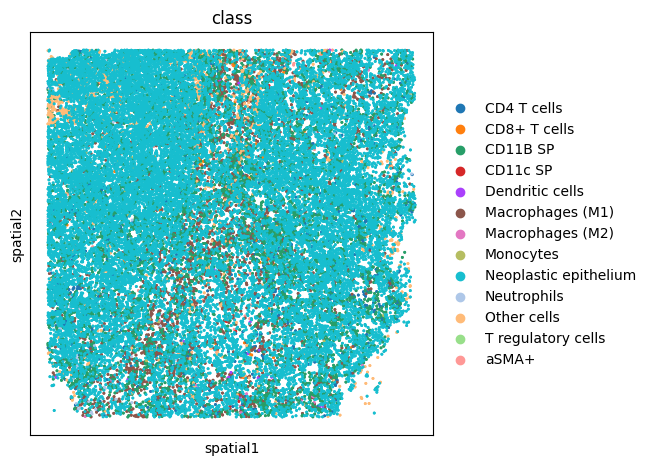

In [3]:
adata = sc.read('anndata/KN00012ROI01.h5ad')
sq.pl.spatial_scatter(adata, shape=None, color="class")

In [5]:
sq.gr.spatial_neighbors(adata)

In [6]:
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_colors', 'spatial_neighbors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


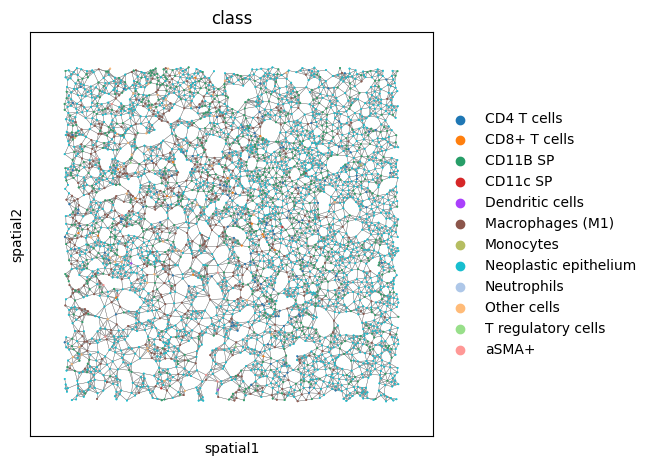

In [18]:
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    crop_coord=(1500, 1500, 3000, 3000 ),
    shape=None,
    size=0.5,
    connectivity_key='spatial_connectivities',
    edges_width= 0.25
    )

100%|████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.50/s]


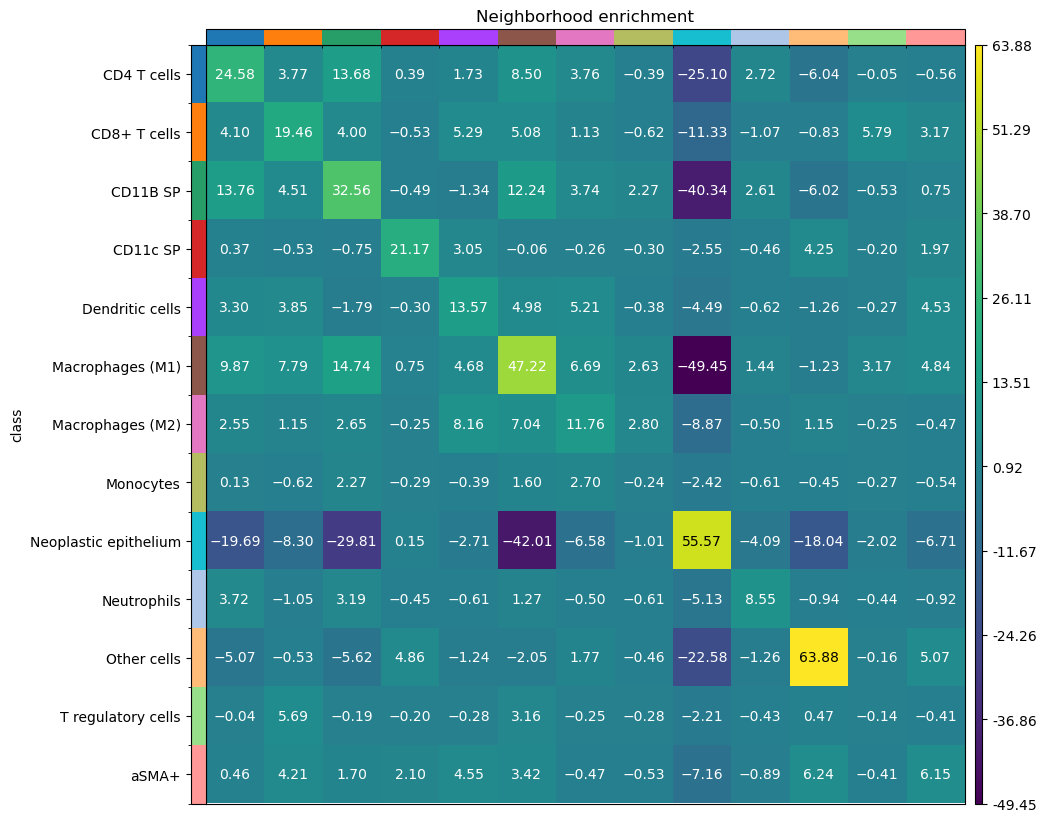

In [13]:
adata = sc.read('anndata/KN00012ROI01.h5ad')
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="class")
sq.pl.nhood_enrichment(adata, cluster_key="class", annotate=True)

In [10]:
adata = sc.read('anndata/KN00012ROI01.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    obsm: 'spatial'


In [11]:
sq.gr.spatial_neighbors(adata)
print(adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'spatial_neighbors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [12]:
sq.gr.nhood_enrichment(adata, cluster_key="class")
print(adata)

100%|████████████████████████████████████████| 1000/1000 [00:07<00:00, 137.42/s]


AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'spatial_neighbors', 'class_nhood_enrichment'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [ ]:
sq.pl.nhood_enrichment(adata, cluster_key="class")

100%|█████████████████████████████████████████████| 91/91 [01:17<00:00,  1.17/s]


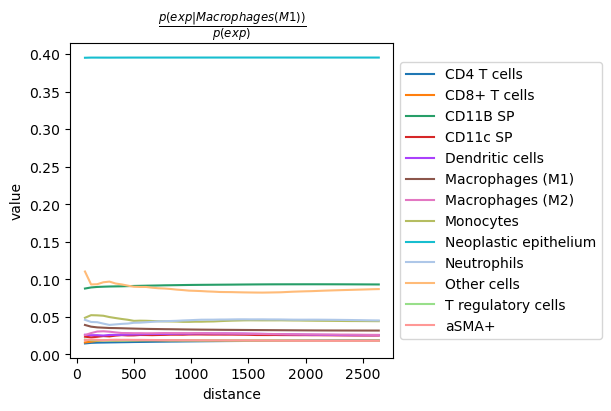

In [7]:
sq.gr.co_occurrence(adata, cluster_key="class")
sq.pl.co_occurrence(
    adata,
    cluster_key="class",
    clusters=["Macrophages (M1)"],
    figsize=(6, 4),
)

In [8]:
adata.write('anndata2.h5ad')

In [9]:
adata1 = sc.read('anndata.h5ad')
adata2 = sc.read('anndata2.h5ad')

In [10]:
print(adata1)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'functional_annotations'
    obsm: 'spatial'


In [11]:
print(adata2)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'class_co_occurrence', 'class_colors', 'functional_annotations'
    obsm: 'spatial'


In [13]:
print (adata)

AnnData object with n_obs × n_vars = 26392 × 10
    obs: 'class'
    uns: 'functional_annotations', 'class_colors', 'class_co_occurrence', 'spatial_neighbors', 'class_nhood_enrichment'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /Users/guoz/python_projects
